<a href="https://colab.research.google.com/github/leahandofir/earthformer-inference-experiments/blob/main/google_colab_experiments/DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cloud Forecasting Transformer Inference Demo

### Preperations

Install the requirements & mount data directory:

In [ ]:
!git clone https://github.com/leahandofir/cloud-forecasting-transformer.git
%cd cloud-forecasting-transformer
!pip install -r inference_requirements.txt
!python3 -m pip install -U -e . --no-build-isolation --extra-index-url --trusted-host

In [2]:
# In this example our data is located in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

Prepare a pretrained Cloudformer model checkpoint file:

In [17]:
!ls -la /content/drive/MyDrive/files_for_demo | grep ckpt

-rw------- 1 root root 159567983 Aug 22 16:55 best.ckpt


Prepare the input sequence:

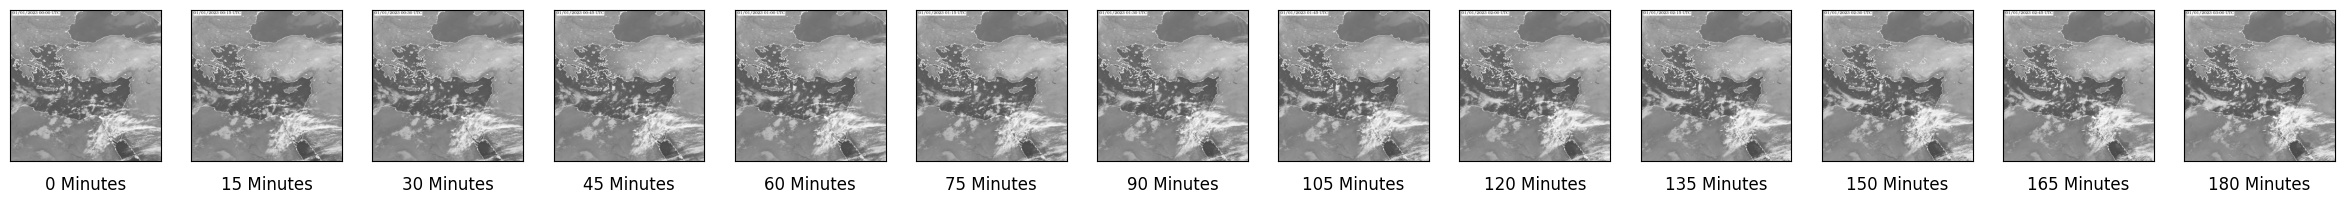

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=13, squeeze=False, figsize=(30,30))

for i in range(0, 195, 15):
  image = mpimg.imread(f"/content/drive/MyDrive/files_for_demo/input_sequence/20230101{(i // 60):02d}{(i % 60):02d}.png")
  ax[0][i // 15].imshow(image)
  ax[0][i // 15].set_title(f"{i} Minutes", y=-0.25)
  ax[0][i // 15].xaxis.set_ticks([])
  ax[0][i // 15].yaxis.set_ticks([])

plt.show()

### Inference

Execute the inference script:

In [22]:
%%capture
! python scripts/cuboid_transformer/ims/ims_inference.py --ckpt /content/drive/MyDrive/files_for_demo/best.ckpt --data-dir /content/drive/MyDrive/files_for_demo/input_sequence --start-time 202301010000 --cmap gray --plot-stride 2  > /dev/null

View the result:

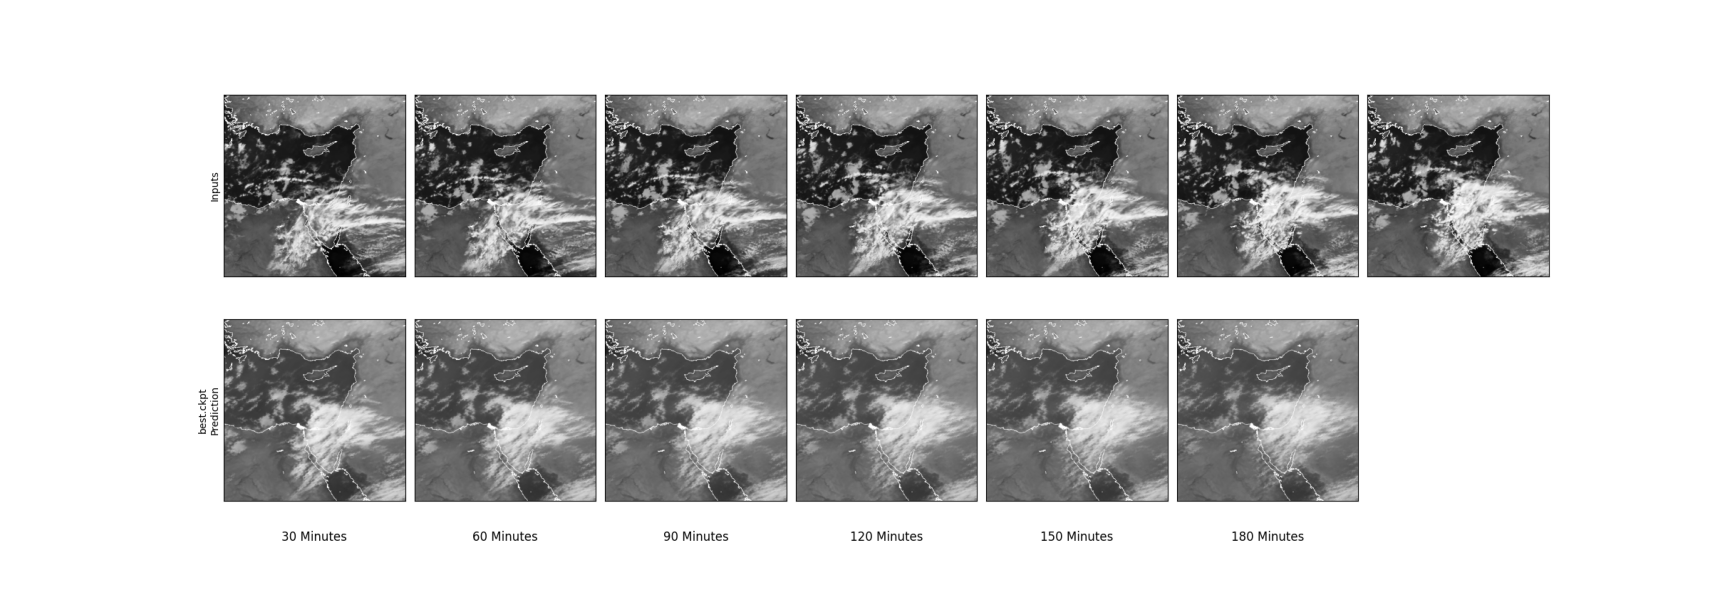

In [13]:
image = mpimg.imread("./prediction_from_202301010000_with_ckpt_best.ckpt.png")
fig, ax = plt.subplots(figsize=(30, 6))
plt.axis('off')
ax.imshow(image)
plt.tight_layout()